# Capstone 3: Solar Energy Storage Project

## Problem:

Find the best location of the three selected areas in the United States where we can best predict the GHI (Global Horizontal Irradiation), key indicator for energy storage potential, with weather indicators of the past 20 years to be able to install solar panels. These points were selected by the company based on historical average values of GHI, and land availability and cost. The data is provided by NASA of the POWER Project over the past 20 years with an hourly frequency.



## Data:


### About the Power project: 

NASA's goal in Earth science is to observe, understand, and model the Earth system to discover how it is changing, to better predict change, and to understand the consequences for life on Earth. The Applied Sciences Program, within the Science Mission Directorate (which replaced both the Office of Earth Science and the Office of Space Science), serves NASA and Society by expanding and accelerating the realization of societal and economic benefits from Earth science, information, and technology research and development.

The Prediction Of Worldwide Energy Resources (POWER) project was initiated to improve upon the current renewable energy data set and to create new data sets from new satellite systems. The POWER project targets three user communities: (1) Renewable Energy, (2) Sustainable Buildings, and (3) Agroclimatology.


### Locations selected:

Lat/Lat of Selected Locations in US:

South Arizona:        32.7805 / -112.8105

South California:     33.3146 / -115.2055

South New Mexico:     32.3175 / -107.7129      



### Variables included:

ALLSKY_SFC_SW_DWN (GHI): All Sky Surface Shortwave Downward Irradiance
The total solar irradiance incident (direct plus diffuse) on a horizontal plane at the surface of the earth under all sky conditions. An alternative term for the total solar irradiance is the "Global Horizontal Irradiance" or GHI.

CLRSKY_SFC_PAR_TOT: Clear Sky Surface PAR Total
The total Photosynthetically Active Radiation (PAR) incident on a horizontal plane at the surface of the earth under clear sky conditions.

CLRSKY_SFC_SW_DWN: Clear Sky Surface Shortwave Downward Irradiance
The total solar irradiance incident (direct plus diffuse) on a horizontal plane at the surface of the earth under clear sky conditions. An alternative term for the total solar irradiance is the "Global Horizontal Irradiance" or GHI.

WS2M: Wind Speed at 2 Meters
The average of wind speed at 2 meters above the surface of the earth.

T2M: Temperature at 2 Meters
The average air (dry bulb) temperature at 2 meters above the surface of the earth.

T2MDEW: Dew/Frost Point at 2 Meters
The dew/frost point temperature at 2 meters above the surface of the earth.

RH2M: Relative Humidity at 2 Meters
The ratio of actual partial pressure of water vapor to the partial pressure at saturation, expressed in percent.

PRECTOTCORR: Precipitation Corrected
The bias corrected average of total precipitation at the surface of the earth in water mass (includes water content in snow).

PS: Surface Pressure
The average of surface pressure at the surface of the earth.

WS10M: Wind Speed at 10 Meters
The average of wind speed at 10 meters above the surface of the earth.

WS50M: Wind Speed at 50 Meters
The average of wind speed at 50 meters above the surface of the earth.



Link: https://power.larc.nasa.gov/data-access-viewer/

# Pre-processing and Training Data Development

In [1]:
#import pandas, numpy, matlab, seaborn

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')


In [2]:
# Import data from previous EDA step
df = pd.read_csv('df_EDA.csv')

In [3]:
# Take a look at the first few rows
df.head()

,DATE,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,WS2M,STATE,T2M,T2MDEW,RH2M,PRECTOTCORR,PS,WS10M,WS50M
0,2003-11-30 16:00:00,9.36,1.83,5.7,0.77,Arizona,18.15,-4.74,20.44,0.0,96.75,1.13,1.55
1,2003-11-30 17:00:00,0.00,0.00,0.0,0.83,Arizona,17.22,-5.59,20.25,0.0,96.78,1.21,1.65
2,2003-11-30 18:00:00,0.00,0.00,0.0,0.89,Arizona,16.22,-5.97,20.88,0.0,96.81,1.31,1.78
3,2003-11-30 19:00:00,0.00,0.00,0.0,1.00,Arizona,15.37,-6.25,21.56,0.0,96.85,1.47,2.01
4,2003-11-30 20:00:00,0.00,0.00,0.0,1.12,Arizona,14.22,-6.11,23.50,0.0,96.89,1.70,2.35


In [4]:
df.columns

Index(['DATE', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_PAR_TOT', 'CLRSKY_SFC_SW_DWN',
       'WS2M', 'STATE', 'T2M', 'T2MDEW', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M',
       'WS50M'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514947 entries, 0 to 514946
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATE                514947 non-null  object 
 1   ALLSKY_SFC_SW_DWN   514947 non-null  float64
 2   CLRSKY_SFC_PAR_TOT  514947 non-null  float64
 3   CLRSKY_SFC_SW_DWN   514947 non-null  float64
 4   WS2M                514947 non-null  float64
 5   STATE               514947 non-null  object 
 6   T2M                 514947 non-null  float64
 7   T2MDEW              514947 non-null  float64
 8   RH2M                514947 non-null  float64
 9   PRECTOTCORR         514947 non-null  float64
 10  PS                  514947 non-null  float64
 11  WS10M               514947 non-null  float64
 12  WS50M               514947 non-null  float64
dtypes: float64(11), object(2)
memory usage: 51.1+ MB


In [6]:
# Convert datetime64 into Unix timestamp (numeric)
df['DATE_NUM'] = pd.to_datetime(df['DATE']).astype(int) // 10**9  # Convert to Unix timestamp

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514947 entries, 0 to 514946
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATE                514947 non-null  object 
 1   ALLSKY_SFC_SW_DWN   514947 non-null  float64
 2   CLRSKY_SFC_PAR_TOT  514947 non-null  float64
 3   CLRSKY_SFC_SW_DWN   514947 non-null  float64
 4   WS2M                514947 non-null  float64
 5   STATE               514947 non-null  object 
 6   T2M                 514947 non-null  float64
 7   T2MDEW              514947 non-null  float64
 8   RH2M                514947 non-null  float64
 9   PRECTOTCORR         514947 non-null  float64
 10  PS                  514947 non-null  float64
 11  WS10M               514947 non-null  float64
 12  WS50M               514947 non-null  float64
 13  DATE_NUM            514947 non-null  int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 55.0+ MB


In [8]:
#Call the info method on df to see a summary of the columns and data types

df.describe(include='all')

,DATE,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,WS2M,STATE,T2M,T2MDEW,RH2M,PRECTOTCORR,PS,WS10M,WS50M,DATE_NUM
count,514947,514947.000000,514947.000000,514947.000000,514947.000000,514947,514947.000000,514947.000000,514947.000000,514947.000000,514947.000000,514947.000000,514947.000000,5.149470e+05
unique,171649,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2003-11-30 16:00:00,NaN,NaN,NaN,NaN,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,171649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,246.252442,118.019928,267.539960,2.619715,NaN,20.455480,1.736003,35.058333,0.019304,93.188626,3.770207,5.410988,1.379174e+09
std,NaN,322.878591,152.053122,342.871392,1.648726,NaN,10.686054,8.332213,21.103906,0.125816,5.568077,2.048560,2.754415,1.783830e+08
min,NaN,0.000000,0.000000,0.000000,0.010000,NaN,-15.770000,-25.220000,1.440000,0.000000,83.460000,0.010000,0.000000,1.070208e+09
25%,NaN,0.000000,0.000000,0.000000,1.380000,NaN,12.260000,-4.510000,18.190000,0.000000,85.640000,2.400000,3.330000,1.224691e+09
50%,NaN,13.620000,4.500000,12.270000,2.180000,NaN,20.240000,1.090000,30.940000,0.000000,96.350000,3.380000,5.120000,1.379174e+09
75%,NaN,499.385000,246.580000,559.520000,3.490000,NaN,28.430000,7.880000,47.940000,0.000000,97.450000,4.690000,7.210000,1.533658e+09


## Plot histograms of each column

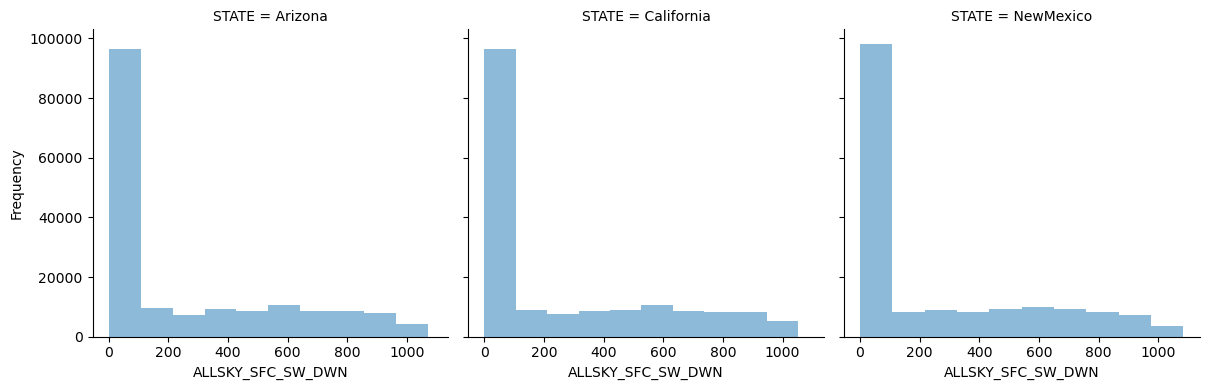

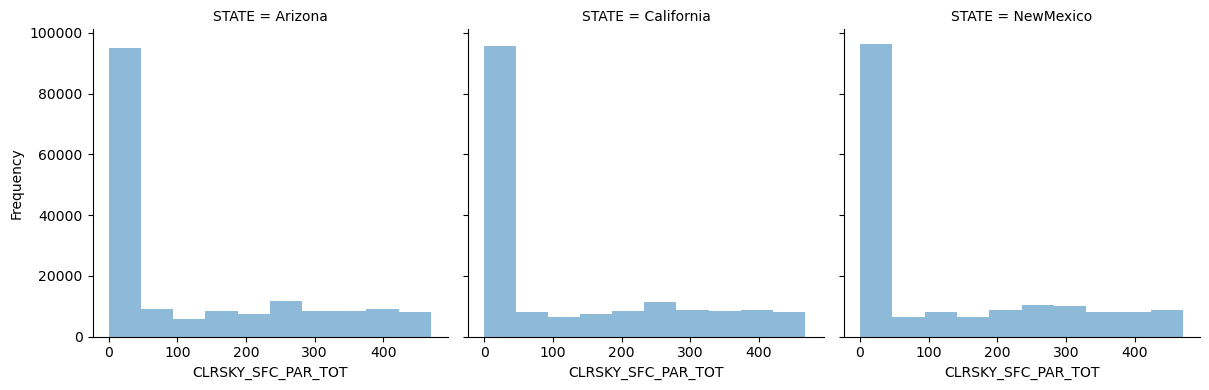

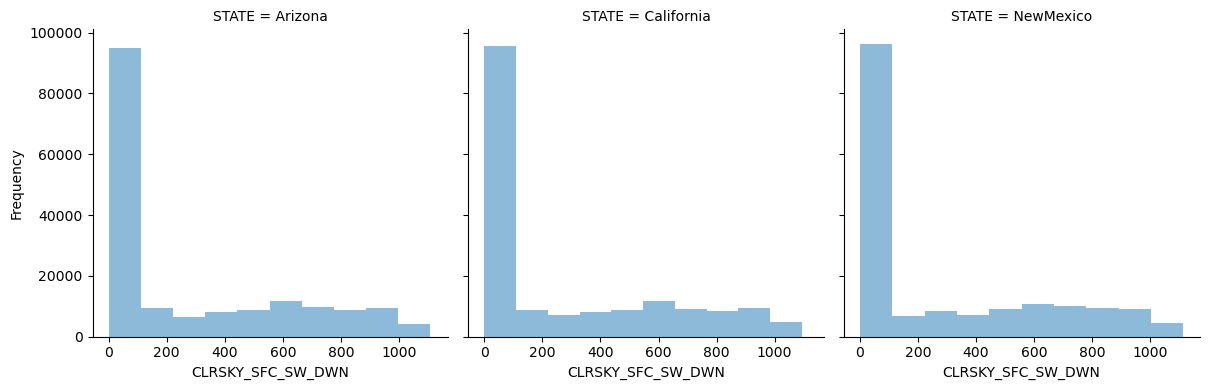

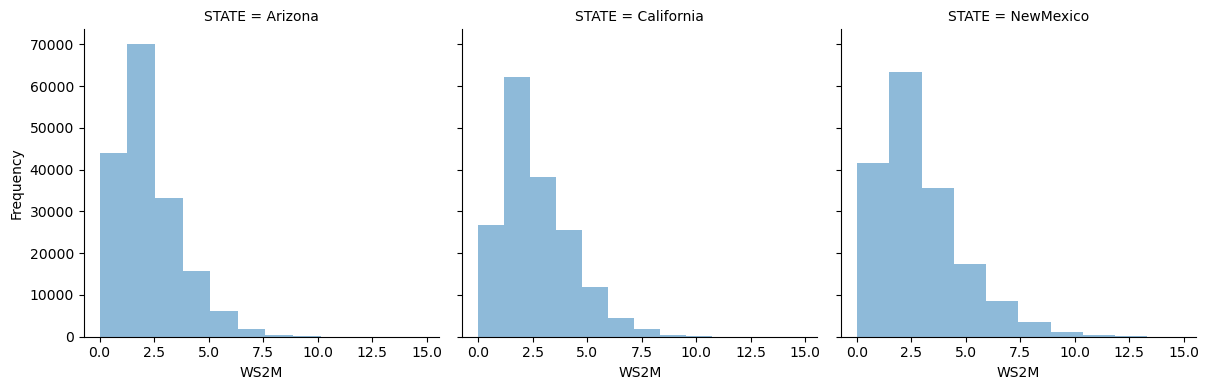

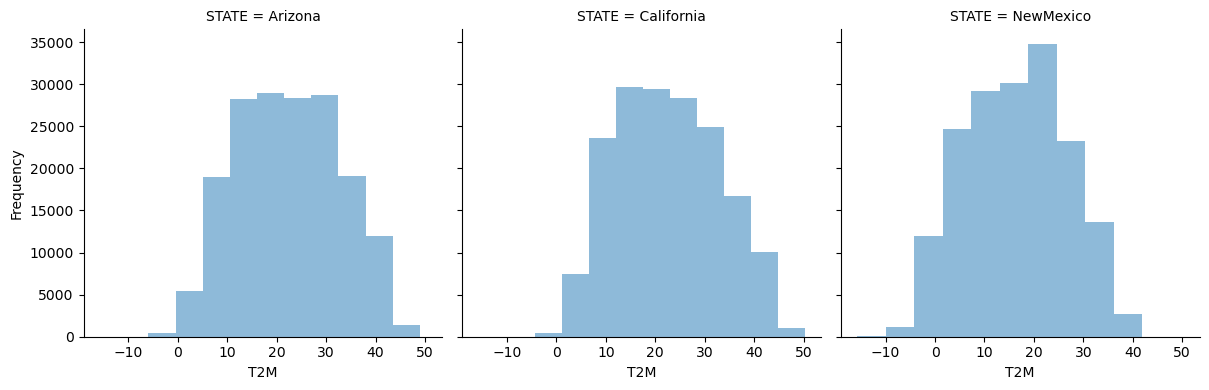

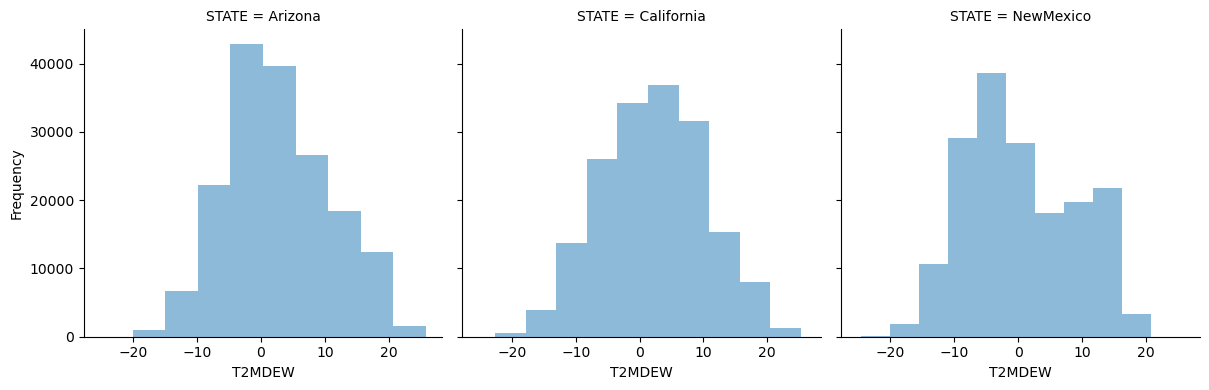

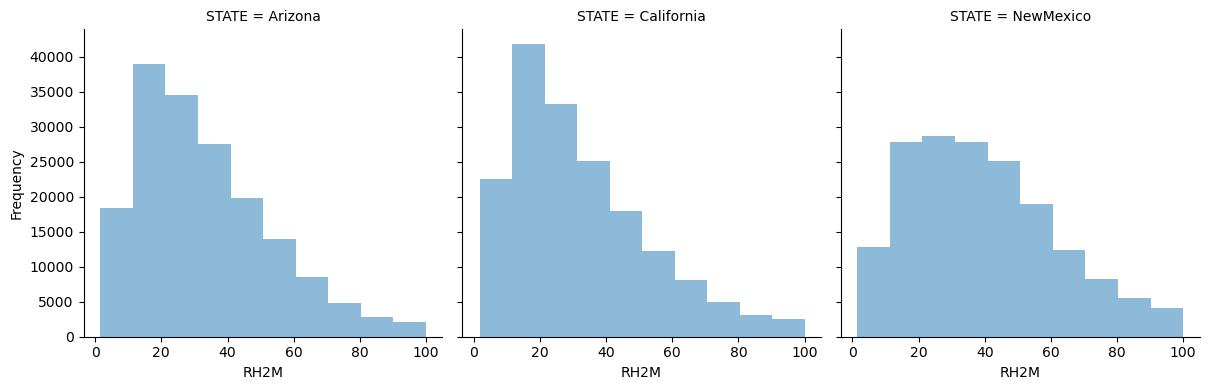

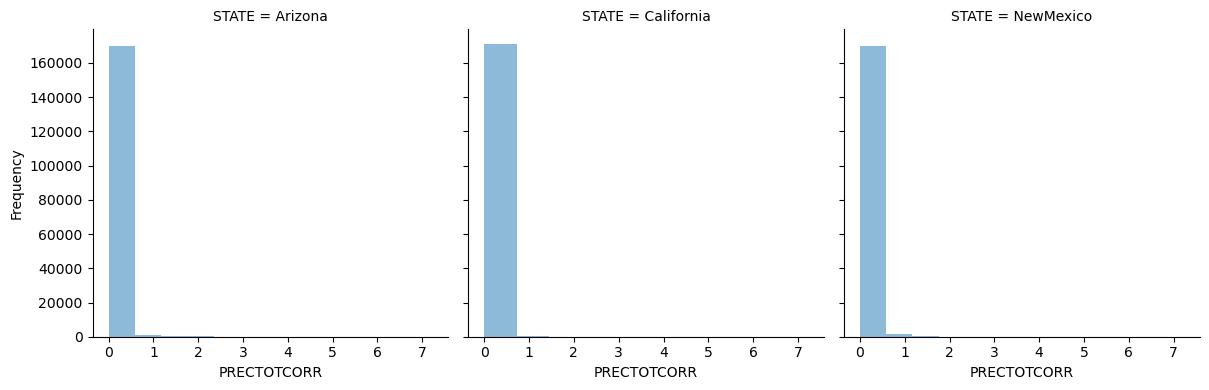

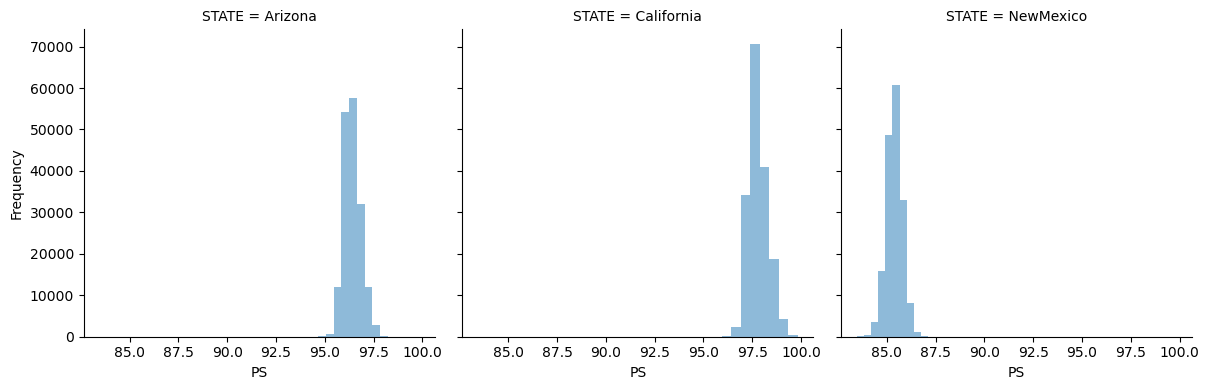

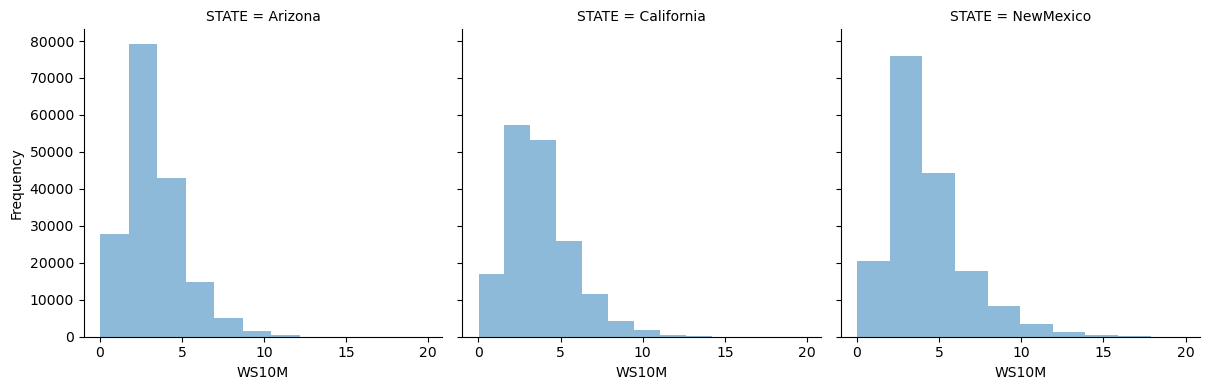

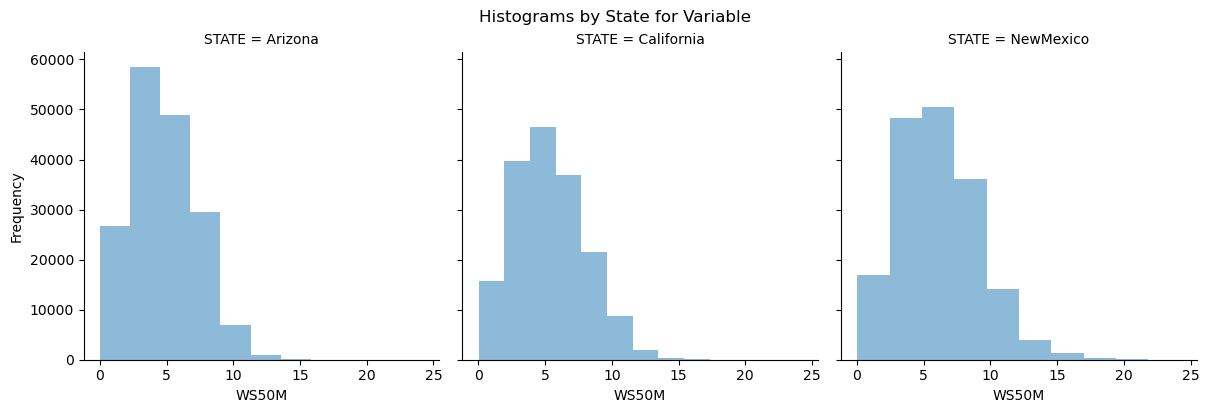

In [9]:
# Set 'STATE' as a categorical variable
df['STATE'] = pd.Categorical(df['STATE'])

# Select columns to plot
columns_to_plot = [
    'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_PAR_TOT', 'CLRSKY_SFC_SW_DWN',
    'WS2M', 'T2M', 'T2MDEW', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WS50M'
]

# Create separate FacetGrids for each column
for column in columns_to_plot:
    g = sns.FacetGrid(df, col='STATE', height=4)
    g.map(plt.hist, column, bins=10, alpha=0.5)
    g.set_axis_labels(column, "Frequency")

# Set overall title
plt.suptitle('Histograms by State for Variable', x=0.5, y=1.02, ha='center', fontsize='large')

# Show the plot
plt.show()

## Create dummy or indicator features for categorical variables.

In [10]:
# Column 'PRECTOTCORR' would be interesting to set as a categorical column since it is the amount of rain that 
# falls, the mayority of the time it is zero so it'll be intereting to have a dummy variable with zero being 
# it didn't rain and 1 it rained

df['PRECTOTCORR_dummy'] = df['PRECTOTCORR'].apply(lambda x: 1 if x > 0 else 0)


In [11]:
df.describe(include='all')

,DATE,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,WS2M,STATE,T2M,T2MDEW,RH2M,PRECTOTCORR,PS,WS10M,WS50M,DATE_NUM,PRECTOTCORR_dummy
count,514947,514947.000000,514947.000000,514947.000000,514947.000000,514947,514947.000000,514947.000000,514947.000000,514947.000000,514947.000000,514947.000000,514947.000000,5.149470e+05,514947.000000
unique,171649,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2003-11-30 16:00:00,NaN,NaN,NaN,NaN,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,171649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,246.252442,118.019928,267.539960,2.619715,NaN,20.455480,1.736003,35.058333,0.019304,93.188626,3.770207,5.410988,1.379174e+09,0.118239
std,NaN,322.878591,152.053122,342.871392,1.648726,NaN,10.686054,8.332213,21.103906,0.125816,5.568077,2.048560,2.754415,1.783830e+08,0.322892
min,NaN,0.000000,0.000000,0.000000,0.010000,NaN,-15.770000,-25.220000,1.440000,0.000000,83.460000,0.010000,0.000000,1.070208e+09,0.000000
25%,NaN,0.000000,0.000000,0.000000,1.380000,NaN,12.260000,-4.510000,18.190000,0.000000,85.640000,2.400000,3.330000,1.224691e+09,0.000000
50%,NaN,13.620000,4.500000,12.270000,2.180000,NaN,20.240000,1.090000,30.940000,0.000000,96.350000,3.380000,5.120000,1.379174e+09,0.000000
75%,NaN,499.385000,246.580000,559.520000,3.490000,NaN,28.430000,7.880000,47.940000,0.000000,97.450000,4.690000,7.210000,1.533658e+09,0.000000


#### Explore when GHI index (ALLSKY_SFC_SW_DWN) is zero how many other columns are also zero

In [12]:

target_column = 'ALLSKY_SFC_SW_DWN' 

# Step 2: Filter rows where GHI is zero
zero_target_rows = df[df[target_column] == 0]

# Step 3: Count how many zeros there are in each column of the filtered DataFrame
zero_counts = zero_target_rows.eq(0).sum()

# Display the counts
print(zero_counts)

DATE                       0
ALLSKY_SFC_SW_DWN     247713
CLRSKY_SFC_PAR_TOT    247713
CLRSKY_SFC_SW_DWN     247713
WS2M                       0
STATE                      0
T2M                       25
T2MDEW                    87
RH2M                       0
PRECTOTCORR           222705
PS                         0
WS10M                      0
WS50M                      1
DATE_NUM                   0
PRECTOTCORR_dummy     222705
dtype: int64


## Split your data into testing and training datasets

First drop the variables I will not be using

In [13]:
df.drop(columns=['DATE', 'CLRSKY_SFC_PAR_TOT', 'CLRSKY_SFC_SW_DWN'], inplace=True)
df.columns

Index(['ALLSKY_SFC_SW_DWN', 'WS2M', 'STATE', 'T2M', 'T2MDEW', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M', 'DATE_NUM', 'PRECTOTCORR_dummy'],
      dtype='object')

In [14]:
# import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Before going ahead I will split the dataframe into the 3 states

In [15]:
df_a = df[df['STATE'] == 'Arizona']
df_c = df[df['STATE'] == 'California']
df_n = df[df['STATE'] == 'NewMexico']

In [16]:
df_a.nunique()

ALLSKY_SFC_SW_DWN     56032
WS2M                    944
STATE                     1
T2M                    4903
T2MDEW                 4245
RH2M                   1576
PRECTOTCORR             304
PS                      359
WS10M                  1243
WS50M                  1496
DATE_NUM             171649
PRECTOTCORR_dummy         2
dtype: int64

In [17]:
# Drop the STATE column in df

In [18]:
df_a.drop(columns=['STATE'], inplace=True)
df_a.columns

Index(['ALLSKY_SFC_SW_DWN', 'WS2M', 'T2M', 'T2MDEW', 'RH2M', 'PRECTOTCORR',
       'PS', 'WS10M', 'WS50M', 'DATE_NUM', 'PRECTOTCORR_dummy'],
      dtype='object')

In [19]:
df_c.drop(columns=['STATE'], inplace=True)
df_c.columns

Index(['ALLSKY_SFC_SW_DWN', 'WS2M', 'T2M', 'T2MDEW', 'RH2M', 'PRECTOTCORR',
       'PS', 'WS10M', 'WS50M', 'DATE_NUM', 'PRECTOTCORR_dummy'],
      dtype='object')

In [20]:
df_n.drop(columns=['STATE'], inplace=True)
df_n.columns

Index(['ALLSKY_SFC_SW_DWN', 'WS2M', 'T2M', 'T2MDEW', 'RH2M', 'PRECTOTCORR',
       'PS', 'WS10M', 'WS50M', 'DATE_NUM', 'PRECTOTCORR_dummy'],
      dtype='object')

In [21]:
# create 'y' variable for each state

In [22]:
y_a = df_a[['ALLSKY_SFC_SW_DWN']]
y_a.columns

Index(['ALLSKY_SFC_SW_DWN'], dtype='object')

In [23]:
y_c = df_c[['ALLSKY_SFC_SW_DWN']]
y_c.columns

Index(['ALLSKY_SFC_SW_DWN'], dtype='object')

In [24]:
y_n = df_n[['ALLSKY_SFC_SW_DWN']]
y_n.columns

Index(['ALLSKY_SFC_SW_DWN'], dtype='object')

In [25]:
# drop the column we want to predict

In [26]:
X_a = df_a.drop(columns=['ALLSKY_SFC_SW_DWN'])
X_a.columns

Index(['WS2M', 'T2M', 'T2MDEW', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WS50M',
       'DATE_NUM', 'PRECTOTCORR_dummy'],
      dtype='object')

In [27]:
X_c = df_c.drop(columns=['ALLSKY_SFC_SW_DWN'])
X_c.columns

Index(['WS2M', 'T2M', 'T2MDEW', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WS50M',
       'DATE_NUM', 'PRECTOTCORR_dummy'],
      dtype='object')

In [28]:
X_n = df_n.drop(columns=['ALLSKY_SFC_SW_DWN'])
X_n.columns

Index(['WS2M', 'T2M', 'T2MDEW', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WS50M',
       'DATE_NUM', 'PRECTOTCORR_dummy'],
      dtype='object')

In [29]:
# Divide the complete dataset into training and testing data

In [30]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size = 0.3, random_state = 42)

In [31]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.3, random_state = 42)

In [32]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.3, random_state = 42)

## Standardize the magnitude of numeric features using a scaler.

In [33]:
# Arizona:

# Making a Scaler object
scaler = StandardScaler()

#  Fit the scaler on the training data
scaler.fit(X_train_a)

# Transform (scale) both the training and test data using the fitted scaler
X_train_scaled_a = scaler.transform(X_train_a)
X_test_scaled_a = scaler.transform(X_test_a)

print(X_train_a.head())
print(X_test_a.head())

        WS2M    T2M  T2MDEW    RH2M  PRECTOTCORR     PS  WS10M  WS50M  \
36466   3.35   9.53    9.66  100.00         0.04  96.42   4.92   8.10   
90720   3.83  26.46   -9.77    7.94         0.00  96.20   5.20   6.47   
115303  1.18   3.93   -1.84   65.81         0.00  96.84   2.40   3.81   
87694   1.60  21.18    4.73   33.94         0.00  96.95   1.96   2.24   
116615  4.23  33.95    2.51   13.75         0.00  96.25   5.69   6.77   

          DATE_NUM  PRECTOTCORR_dummy  
36466   1201485600                  1  
90720   1396800000                  0  
115303  1485298800                  0  
87694   1385906400                  0  
116615  1490022000                  0  
        WS2M    T2M  T2MDEW   RH2M  PRECTOTCORR     PS  WS10M  WS50M  \
52491   1.78  12.76  -12.60  14.69          0.0  96.68   3.89   6.72   
151159  1.49   8.55  -12.21  20.06          0.0  96.22   2.78   4.20   
46160   2.38   7.48    0.85  62.88          0.0  96.37   3.77   7.50   
161660  3.50  32.12   -2.37  10.6

In [34]:
# California:

# Making a Scaler object
scaler = StandardScaler()

#  Fit the scaler on the training data
scaler.fit(X_train_c)

# Transform (scale) both the training and test data using the fitted scaler
X_train_scaled_c = scaler.transform(X_train_c)
X_test_scaled_c = scaler.transform(X_test_c)

print(X_train_c.head())
print(X_test_c.head())

        WS2M    T2M  T2MDEW    RH2M  PRECTOTCORR     PS  WS10M  WS50M  \
208115  1.88   6.05    6.54  100.00          0.0  97.69   3.38   6.86   
262369  4.21  27.71   -7.74    8.88          0.0  97.84   5.59   6.77   
286952  1.64   3.99   -1.22   68.94          0.0  98.34   3.39   6.24   
259343  4.08  23.12    0.23   22.00          0.0  98.45   5.32   6.33   
288264  5.17  30.72   -0.39   13.44          0.0  97.66   6.85   7.91   

          DATE_NUM  PRECTOTCORR_dummy  
208115  1201485600                  0  
262369  1396800000                  0  
286952  1485298800                  0  
259343  1385906400                  0  
288264  1490022000                  0  
        WS2M    T2M  T2MDEW   RH2M  PRECTOTCORR     PS  WS10M  WS50M  \
224140  2.17  11.81  -11.70  17.06          0.0  98.21   4.20   8.08   
322808  1.82   8.80   -9.66  25.25          0.0  97.54   3.94   7.09   
217809  2.17   7.60    2.86  72.00          0.0  97.85   3.51   7.10   
333309  3.33  28.98   -6.39   9.1

In [35]:
# New Mexico:

# Making a Scaler object
scaler = StandardScaler()

#  Fit the scaler on the training data
scaler.fit(X_train_n)

# Transform (scale) both the training and test data using the fitted scaler
X_train_scaled_n = scaler.transform(X_train_n)
X_test_scaled_n = scaler.transform(X_test_n)

print(X_train_n.head())
print(X_test_n.head())

        WS2M    T2M  T2MDEW   RH2M  PRECTOTCORR     PS  WS10M  WS50M  \
379764  5.55   8.73    7.01  88.81         0.37  84.98   7.74  11.32   
434018  5.75  18.90   -8.92  13.69         0.01  84.69   7.57   8.99   
458601  1.85  -2.52   -6.22  76.06         0.00  84.99   3.47   6.61   
430992  1.48  18.46   -0.15  28.38         0.00  85.64   1.81   2.11   
459913  3.27  28.23    3.39  20.31         0.00  85.47   4.06   4.62   

          DATE_NUM  PRECTOTCORR_dummy  
379764  1201485600                  1  
434018  1396800000                  1  
458601  1485298800                  0  
430992  1385906400                  0  
459913  1490022000                  0  
        WS2M    T2M  T2MDEW   RH2M  PRECTOTCORR     PS  WS10M  WS50M  \
395789  1.95   2.84  -13.48  26.50          0.0  85.79   4.11   7.79   
494457  1.61   3.91  -12.50  26.88          0.0  84.90   3.43   5.47   
389458  5.13  11.90    0.52  45.50          0.0  85.01   7.15  10.61   
504958  6.37  31.51   -7.88   6.94     

In [36]:
# Save the DataFrame to a CSV file

X_train_a.to_csv('X_train_a.csv', index=False)
X_test_a.to_csv('X_test_a.csv', index=False)
y_train_a.to_csv('y_train_a.csv', index=False)
y_test_a.to_csv('y_test_a.csv', index=False)

X_train_c.to_csv('X_train_c.csv', index=False)
X_test_c.to_csv('X_test_c.csv', index=False)
y_train_c.to_csv('y_train_c.csv', index=False)
y_test_c.to_csv('y_test_c.csv', index=False)

X_train_n.to_csv('X_train_n.csv', index=False)
X_test_n.to_csv('X_test_n.csv', index=False)
y_train_n.to_csv('y_train_n.csv', index=False)
y_test_n.to_csv('y_test_n.csv', index=False)
